In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
def create_model(initializer, dropout_rate, regularizer, Activation):
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation=Activation, kernel_initializer=initializer, kernel_regularizer=regularizer),
        layers.Dropout(dropout_rate),
        layers.Dense(256, activation=Activation, kernel_initializer=initializer, kernel_regularizer=regularizer),
        layers.Dropout(dropout_rate),
        layers.Dense(128, activation=Activation, kernel_initializer=initializer, kernel_regularizer=regularizer),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation=Activation, kernel_initializer=initializer, kernel_regularizer=regularizer),
        layers.Dense(32, activation=Activation, kernel_initializer=initializer, kernel_regularizer=regularizer),
        layers.Dense(10, activation='softmax'),
    ])
    return model

In [4]:
Xav_initializer = initializers.glorot_normal()
Kai_initializer = initializers.he_normal()

In [12]:
Xav_model = create_model(Xav_initializer, 0.03, tf.keras.regularizers.l2(0.001), 'sigmoid')
Kai_model = create_model(Kai_initializer, 0.03, tf.keras.regularizers.l2(0.001), 'relu')

In [13]:
Xav_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
Kai_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
xav_history = Xav_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.0994 - loss: 2.4623 - val_accuracy: 0.1000 - val_loss: 2.3139
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1023 - loss: 2.3123 - val_accuracy: 0.1000 - val_loss: 2.3066
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.1002 - loss: 2.3072 - val_accuracy: 0.1000 - val_loss: 2.3062
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1016 - loss: 2.3063 - val_accuracy: 0.1000 - val_loss: 2.3053
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0993 - loss: 2.3065 - val_accuracy: 0.1000 - val_loss: 2.3051
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0966 - loss: 2.3064 - val_accuracy: 0.1000 - val_loss: 2.3081
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1035 - loss: 2.3053 - val_accuracy: 0.1000 - val_loss: 2.3051
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.1015 - loss: 2.30

In [14]:
Kai_history = Kai_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.2178 - loss: 2.8433 - val_accuracy: 0.3495 - val_loss: 1.9698
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3364 - loss: 1.9666 - val_accuracy: 0.3515 - val_loss: 1.8769
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3497 - loss: 1.8911 - val_accuracy: 0.3820 - val_loss: 1.8183
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3689 - loss: 1.8439 - val_accuracy: 0.3921 - val_loss: 1.8108
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3814 - loss: 1.8234 - val_accuracy: 0.3631 - val_loss: 1.8487
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3808 - loss: 1.8056 - val_accuracy: 0.4143 - val_loss: 1.7465
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3898 - loss: 1.7922 - val_accuracy: 0.3996 - val_loss: 1.7603
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3984 - loss: 1.779

In [16]:
print("Xav_model Accuracy:", Xav_model.evaluate(x_test, y_test)[1])
print("Kai_model Accuracy:", Kai_model.evaluate(x_test, y_test)[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0988 - loss: 2.3072
Xav_model Accuracy: 0.10000000149011612
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4378 - loss: 1.6808
Kai_model Accuracy: 0.4399999976158142


In [17]:
Xav_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,244,800 (20.01 MB)

 Trainable params: 1,748,266 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,496,534 (13.34 MB)

In [18]:
Kai_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,244,800 (20.01 MB)

 Trainable params: 1,748,266 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,496,534 (13.34 MB)

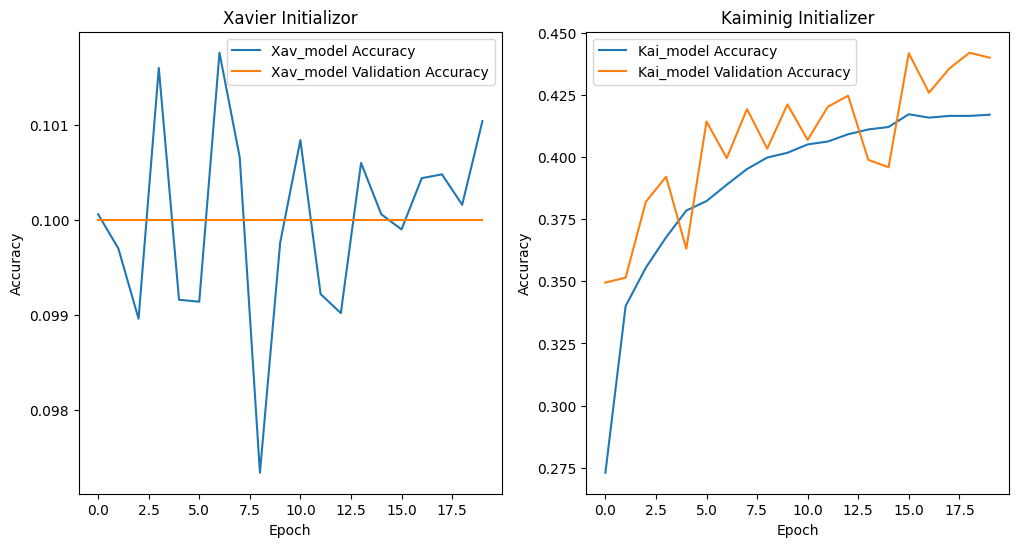

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(xav_history.history['accuracy'], label='Xav_model Accuracy')
plt.plot(xav_history.history['val_accuracy'], label='Xav_model Validation Accuracy')
plt.title('Xavier Initializor')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Kai_history.history['accuracy'], label='Kai_model Accuracy')
plt.plot(Kai_history.history['val_accuracy'], label='Kai_model Validation Accuracy')
plt.title('Kaiminig Initializer')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()